# Curve-fit
- find relationship between x and y  
x = {x0, x1, ... , x(n), y = {y0, y1, ... , y(n)  
- you will do this by selecting the model and iterating parameters.

### Model
- y = f(x0, x1, ... , xn)
- y = a0 + a1x (linear)
- y = a0 + a1x + a2x^2 (Quadratic)
- y = a0 + a1x + a2x^2 + ... + anx^n (Polynomial)
- If you have a same dimension of polynomial with the number of point you have, you will get the curve that goes through every single point. This is overfitting, it will be too complex


### Find parameter ai
- Prediction
- y0p = f(x0, ai) ; Error : e0 = y0 - y0p
- y1p = f(x1, ai) ; Error : e1 = y1 - y1p
- ...
- ynp = f(xn, ai) ; Error : en = yn - ynp
- Error vector : e = {e0, e1, ... , en} ; find parameters of the curve to minimize error vector or minimize the norm of error vector
### How to calculate norm
- (sigma((ei)^2 ))^1/2 : L2 norm
- sigma(abs(ei)) : L infinity norm
### Curve fitting can be phrased : Given {xi}, {yi} and model y =f(xi,ai), find ai such that norm(e) is minimum.

In [4]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Curve fitting from linear regression : fit polynomial

(50,)
(50, 1)
a_0 is: 0.5383383038879872 original a_0 is : 0.5
a_1 is: [0.6979566] original a_1 is : 0.7
[0.6979566]
The predicted value of y at x=1.5 is:
[1.58527321]


Text(0.5, 1.0, 'Model fit')

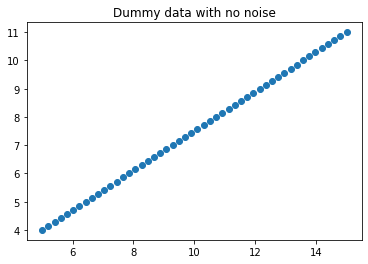

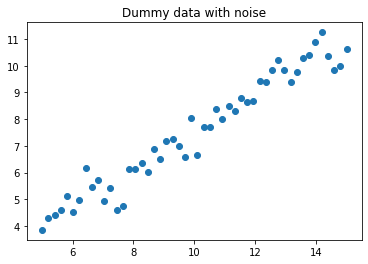

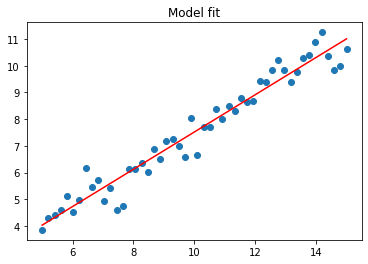

In [7]:
#Curve fit - linear
#Create some dummy model data by choosing a_0=0.5 and a_1=0.7
x_dummy = np.linspace(start=5, stop=15, num=50)
y_dummy = 0.5+0.7*x_dummy

#Right now the data corresponds to exactly a straight line:
plt.figure()
plt.scatter(x_dummy,y_dummy)
plt.title('Dummy data with no noise')

#Let's add some noise to the data
noise = 0.5*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise
plt.figure()
plt.scatter(x_dummy,y_dummy)
plt.title('Dummy data with noise')

#Currently the shape is not appropriate for linear regression
print(np.shape(x_dummy))
x_dummy_reshaped = x_dummy.reshape(len(x_dummy),1)
#Now the shape is correct
print(np.shape(x_dummy_reshaped))

#Fit between x_dummy_reshaped and y_dummy


#Syntax for the LinearRegression function
reg = LinearRegression().fit(x_dummy_reshaped, y_dummy)


#The constant coefficient (a_0 in this case) is stored in reg.intercept_

#Make sure that reg.intercept_ is a_0 and reg.coef_ is a_1

a_0=reg.intercept_
print('a_0 is: {} original a_0 is : {}'.format(a_0, 0.5))

#Note that a_0 is not exactly 0.5 as we initially used - this is due to the random error

#The slope (a_1 in this case) is stored in reg.coef_
a_1=reg.coef_
print('a_1 is: {} original a_1 is : {}'.format(a_1, 0.7))

#You can use the fitted model to predict. Here predicting at x=1.5
print('The predicted value of y at x=1.5 is:')
print(reg.predict(np.array([[1.5]])))


plt.figure()
plt.scatter(x_dummy,y_dummy)
plt.plot(x_dummy_reshaped,reg.predict(x_dummy_reshaped),color='red')
plt.title('Model fit')

a_0 is:
-12.49274372952732
a_1,a_2 are:
a_1= 1.9387349265800686
a_2= 2.1034453308434413


Text(0.5, 1.0, 'Model fit')

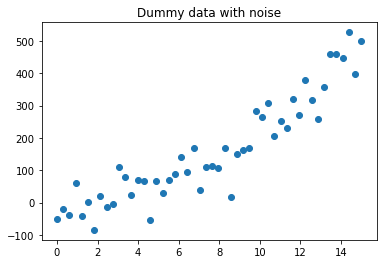

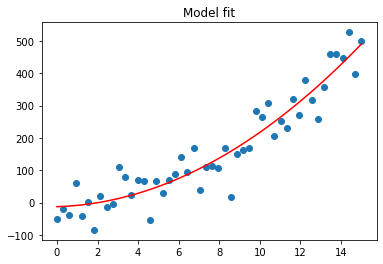

In [13]:
#Curve fit quadratic
a_0,a_1,a_2 = 3.,1.,2.
x_dummy = np.linspace(start=0, stop=15, num=50)
y_dummy = a_0+a_1*x_dummy+a_2*x_dummy**2
noise = 50.*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise
plt.figure()
plt.scatter(x_dummy,y_dummy)
plt.title('Dummy data with noise')

#Create an X matrix with the proper shape for LinearRegression
X=np.empty((len(x_dummy),2))
X[:,0]=x_dummy
X[:,1]=x_dummy**2
# if you provide linear regression with a metrix containing x and x^2 , it automatically fits into quadratic

#Fit a model
reg = LinearRegression().fit(X, y_dummy)
print('a_0 is:')
print(reg.intercept_)

print('a_1,a_2 are:')
print('a_1=', end = ' ')
print(reg.coef_[0])
print('a_2=', end = ' ')
print(reg.coef_[1])

plt.figure()
plt.scatter(x_dummy,y_dummy)
plt.plot(x_dummy,reg.predict(X),color='red')
plt.title('Model fit')

#########This example becomes even more interesting if you increase the noise above.
#That significantly changes the calculated values of a_0,a_1,a_2.

# Curve fitting from scipy : fit any model
- linear regression uses system of linear equations, scipy doesn't.

a=
0.7219405357643257
b=
0.47596370418162554


Text(0.5, 1.0, 'Model fit')

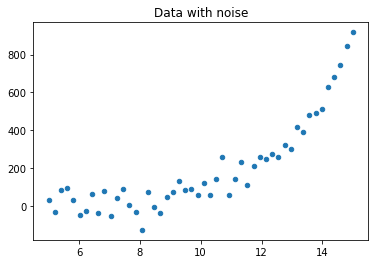

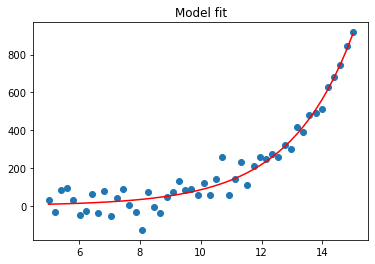

In [14]:
# Function to calculate the exponential with constants a and b
def exponential(x, a, b):
    return a*np.exp(b*x)

# Generate dummy dataset
x_dummy = np.linspace(start=5, stop=15, num=50)

# Calculate y-values based on dummy x-values
y_dummy = exponential(x_dummy, 0.5, 0.5)

# Add noise from a Gaussian distribution
noise = 50*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise

# Plot the noisy exponential data
plt.figure()
plt.scatter(x_dummy, y_dummy, s=20)
plt.title('Data with noise')

# Fit the dummy exponential data
pars, cov = curve_fit(f = exponential, xdata = x_dummy, ydata = y_dummy, p0 = [0, 0], bounds = (-np.inf, np.inf))
# parameters, covarriance(basically errors)
# = curve_fit( function, xdata, ydata, initial guesses (p0), limits of parameter(if np.inf, no limit))

## More details about this are given here: 
# https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509

print('a=')
print(pars[0])

print('b=')
print(pars[1])


plt.figure()
plt.scatter(x_dummy,y_dummy)
plt.plot(x_dummy,exponential(x_dummy,pars[0],pars[1]),color='red')
plt.title('Model fit')

# What if we have more than one set of variables?  
### One Set Variables :  
- x0  y0
- x1  y1
- ...
- xn  yn
- Assum model : f(x,ai) (i = 0,1,...,n)
- Calculate error : e = {e0, e1, ..., en}
- Total error : norm of vector e, denoted E
- Find parameter ai that minimize the norm of e
### Multiple variable input, single output :  
- input : x(vector) = {x,y}  output : z
- x0 = {x0,y0} -> z0
- x1 = {x1,y1} -> z1
- ...
- xn = {xn,yn} -> zn
- Assume model : f(vector x, ai) = f(x,y,ai) (i = 0,1,...,n) - example : z = a0 + a1 * x + a2 * y
- Prediction : zpi
- Error : ei = zpi - zi -> E = norm(ei)
#### Issue 1 : How will you assume a model ? For one set, you can visualize and assume. But for multiple, you can't.  
- Use neural network. No need to assume a model.
#### Issue 2 : How to solve the minimization problem ? - Gradient Descent. No problem once we have model.  